# Simple Linear Regression. Model the function:  y = 2x - 3z + 5

(1000, 2)
(1000, 1)


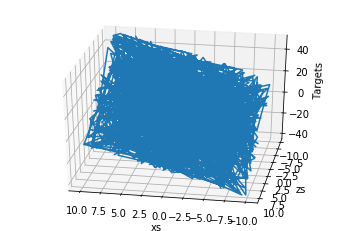

[[ 0.00288646]
 [-0.00818916]]
[0.09748841]
222.995939763318
36.78778185870306
14.18155504979827
11.096133951815112
10.359669004824344
9.919413179869583
9.528725179885482
9.157388738458897
8.801226959829467
8.459225608632082
8.130773654929065
7.815328424954718
7.512374129647099
7.221416066439852
6.9419792034914956
6.673607329154984
6.415862297868122
6.168323313676219
5.930586243093181
5.702262955292672
5.482980688441335
5.27238144112551
5.070121387876145
4.875870317837489
4.689311095663039
4.510139143758686
4.338061945027675
4.172798565305613
4.014079194705836
3.861644707126341
3.715246237199084
3.574644773991066
3.4396107707937764
3.3099237703639974
3.18537204500412
3.0657522508943664
2.950869096112554
2.840535021799467
2.7345698959492437
2.6328007193248815
2.53506134301876
2.441192197197031
2.3510400305850454
2.2644576602684947
2.1813037314017887
2.1014424864313788
2.0247435434572236
1.9510816833706233
1.880336645420794
1.8123929308765439
1.7471396144624016
1.6844701632614225
1.62428

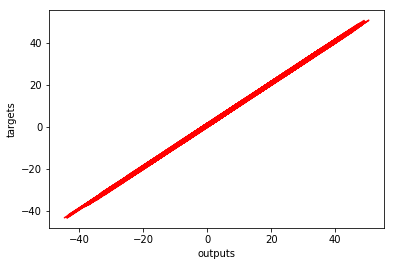

In [4]:
# import the libraries 
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# size of the training set 
observations = 1000

# two random inputs variables 
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
inputs = np.column_stack((xs,zs))

# Check the dimensions of the inputs - 1000 x 2
print (inputs.shape)


# small random noise added to the function
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to the f(x,z) = 2x - 3z + 5 + noise definition.
targets = 2*xs - 3*zs + 5 + noise

# Check the shape of the targets - 1000 x 1.
print (targets.shape)

# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations,)


# Plotting the train data to see a trend

# Declare the figure
fig = plt.figure()

# Create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# Set data plot angle
ax.view_init(azim=100)

# Show the plot. 
plt.show()

# Reshape the targets back to the shape that they were in before plotting.
targets = targets.reshape(observations,1)


# Init the weights and biases randomly in small initial range.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# The weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

# Print the weights to get a sense of how they were initialized.
print (weights)
print (biases)


# Set the learning rate
learning_rate = 0.02


# Train the model

for i in range (100):
    
    # This is the linear model: y = xw + b equation
    outputs = np.dot(inputs,weights) + biases
    # The deltas are the differences between the outputs and the targets
    deltas = outputs - targets
        
    # Calculate the loss function
    loss = np.sum(deltas ** 2) / 2 / observations
    
    # Print the loss function value at each step to see whether it is decreasing
    print (loss)
    
    # Scale the deltas the same way as the loss function
    # In this way learning rate is independent of the number of samples (observations)
    deltas_scaled = deltas / observations
    
    # Gradient descent update rule 
    # The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
    # Transpose the inputs to get an allowed operation.
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    
    
# Print weights and biases to check if theirs values are correct
print (weights, biases)
    
    
# Print the outputs and the targets in order to see if they have a linear relationship. Should be 45 degree.
plt.plot(outputs,targets, 'r')
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()